In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
PATH = 'batik/'
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [ ]:
# Reading images from folder

images = []
classes = []
labels = {}

for i, classdir in enumerate(os.listdir(PATH)):
    for filename in os.listdir(os.path.join(PATH, classdir)):
        image = load_img(os.path.join(PATH, classdir, filename), target_size=(IMG_WIDTH, IMG_HEIGHT), color_mode='rgb')
        image = img_to_array(image)
        
        images.append(image)
        classes.append(i)
        
    labels[i] = classdir
    print(f"{classdir}")

batik-celup
batik-megamendung
batik-parang


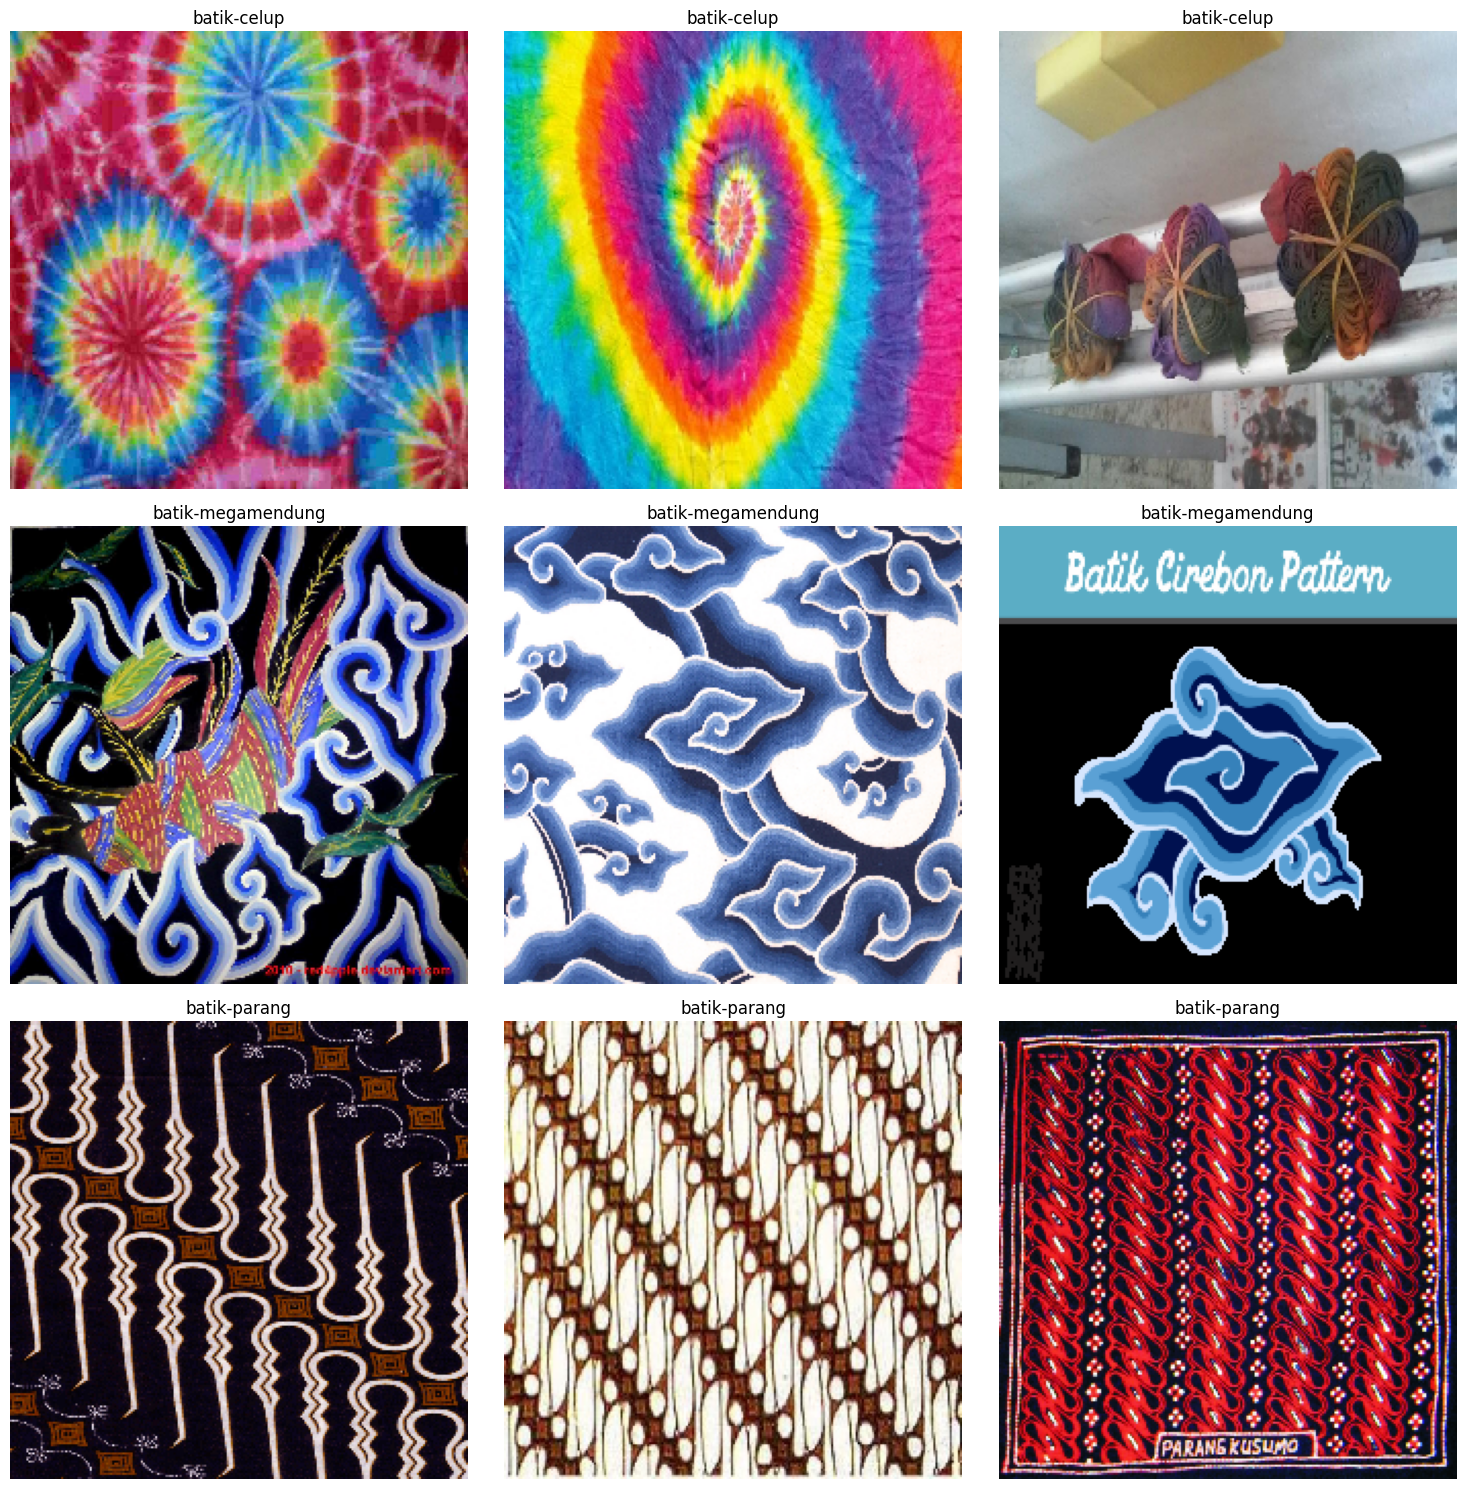

In [100]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Create a figure
plt.figure(figsize=(15, 5*len(labels)))  # Adjust size based on number of classes

# For each class
for class_idx in labels:
    # Get indices of all images in this class
    class_indices = [i for i, x in enumerate(classes) if x == class_idx]
    
    # Randomly select 3 images (or all if less than 3)
    sample_indices = random.sample(class_indices, min(3, len(class_indices)))
    
    # Plot each sample
    for i, idx in enumerate(sample_indices):
        plt.subplot(len(labels), 3, class_idx * 3 + i + 1)
        plt.imshow(images[idx].astype(np.uint8))
        plt.title(f'{labels[class_idx]}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [101]:
# MobileNet require preprocess_input to be called on the inputs
from tensorflow.keras.applications.mobilenet import preprocess_input

x = preprocess_input(np.array(images))
y = tf.keras.utils.to_categorical(classes, num_classes=len(labels))

In [65]:
x[1]

array([[[-0.8980392 , -0.4588235 , -0.05882353],
        [-0.90588236, -0.46666664, -0.06666666],
        [-0.92941177, -0.5137255 , -0.10588235],
        ...,
        [-0.92941177, -0.5372549 , -0.12156862],
        [-0.9137255 , -0.4588235 , -0.06666666],
        [-0.9137255 , -0.4588235 , -0.06666666]],

       [[-0.9137255 , -0.47450978, -0.0745098 ],
        [-0.9372549 , -0.52156866, -0.11372548],
        [-0.9137255 , -0.5137255 , -0.09803921],
        ...,
        [-0.9137255 , -0.5137255 , -0.09803921],
        [-0.9764706 , -0.5372549 , -0.1372549 ],
        [-0.90588236, -0.45098037, -0.05882353]],

       [[-0.92156863, -0.46666664, -0.0745098 ],
        [-0.94509804, -0.5294118 , -0.12156862],
        [-0.8980392 , -0.5058824 , -0.09019607],
        ...,
        [-0.92941177, -0.49019605, -0.09019607],
        [-0.9843137 , -0.5686275 , -0.1607843 ],
        [-0.92941177, -0.4588235 , -0.06666666]],

       ...,

       [[-0.92156863, -0.49019605, -0.06666666],
        [-0

In [66]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.7, random_state=123, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123, stratify=y_temp)

print(f"X_train size: {len(x_train)}")
print(f"X_test size: {len(x_test)}")
print(f"X_val size: {len(x_val)}")
print(f"y_train size: {len(y_train)}")
print(f"y_test size: {len(y_test)}")
print(f"y_val size: {len(y_val)}")

X_train size: 102
X_test size: 22
X_val size: 22
y_train size: 102
y_test size: 22
y_val size: 22


In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,           
    horizontal_flip=True,  
    fill_mode='nearest',
)

val_data_generator = ImageDataGenerator()

train_generator = train_data_generator.flow(x_train, y_train, batch_size=32)
val_generator = val_data_generator.flow(x_val, y_val, batch_size=32)

In [68]:
num_images = len(x_train)
batch_size = 32

augmented_images_count = num_images * batch_size
print(f"Number of images in augmented dataset: {augmented_images_count}")


Number of images in augmented dataset: 3264


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


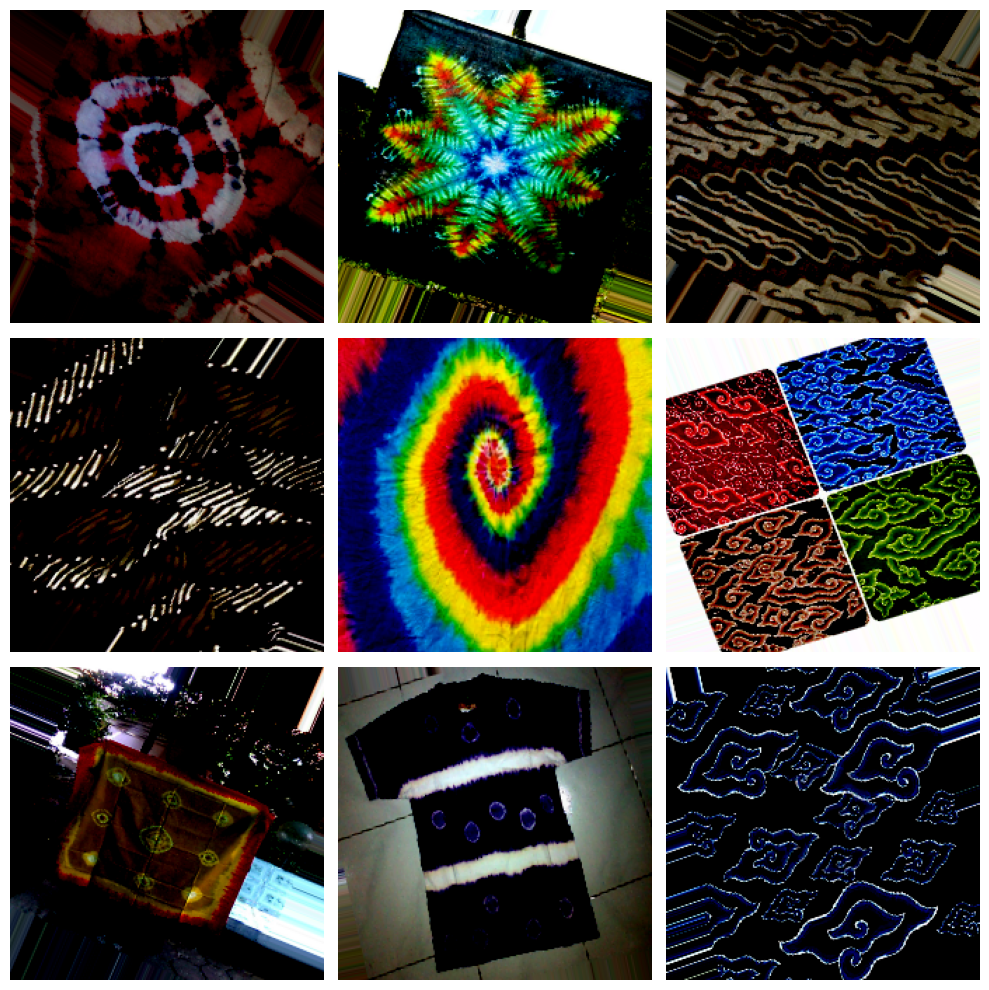

In [69]:
augmented_images, augmented_labels = next(train_generator)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

# mobilenet 128, 64, 32 dropout

In [93]:
pretrained_model = tf.keras.applications.MobileNet(
                        include_top=False,
                        input_shape=(224, 224, 3),
                        weights='imagenet')

pretrained_model.trainable = False
    
model = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_11  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_28 (Dense)            (None, 256)               262400    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 3)                 771       
                                                                 
Total params: 3,492,035
Trainable params: 263,171
Non-

In [94]:
model.summary(show_trainable=True)

Model: "sequential_6"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   N          
 nal)                                                                       
                                                                            
 global_average_pooling2d_11  (None, 1024)             0         Y          
  (GlobalAveragePooling2D)                                                  
                                                                            
 dense_28 (Dense)            (None, 256)               262400    Y          
                                                                            
 dropout_17 (Dropout)        (None, 256)               0         Y          
                                                                            
 dense_29 (Dense)            (None, 3)                

In [95]:
epochs = 200
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, validation_data=val_generator, epochs=epochs, callbacks=[early_stopping])

Epoch 1/200
4/4 [==============================] - 3s 438ms/step - loss: 1.4951 - accuracy: 0.4608 - val_loss: 0.9822 - val_accuracy: 0.5909
Epoch 2/200
4/4 [==============================] - 1s 299ms/step - loss: 1.5044 - accuracy: 0.4706 - val_loss: 0.7884 - val_accuracy: 0.6818
Epoch 3/200
4/4 [==============================] - 1s 392ms/step - loss: 1.0644 - accuracy: 0.5294 - val_loss: 0.6911 - val_accuracy: 0.6364
Epoch 4/200
4/4 [==============================] - 1s 321ms/step - loss: 1.0876 - accuracy: 0.5784 - val_loss: 0.6193 - val_accuracy: 0.6818
Epoch 5/200
4/4 [==============================] - 1s 320ms/step - loss: 0.9013 - accuracy: 0.5980 - val_loss: 0.5517 - val_accuracy: 0.7727
Epoch 6/200
4/4 [==============================] - 1s 389ms/step - loss: 0.7974 - accuracy: 0.6961 - val_loss: 0.4988 - val_accuracy: 0.8182
Epoch 7/200
4/4 [==============================] - 1s 399ms/step - loss: 0.6896 - accuracy: 0.7451 - val_loss: 0.4660 - val_accuracy: 0.8182
Epoch 8/200
4

In [96]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 225ms/step - loss: 0.0545 - accuracy: 1.0000


[0.054521594196558, 1.0]

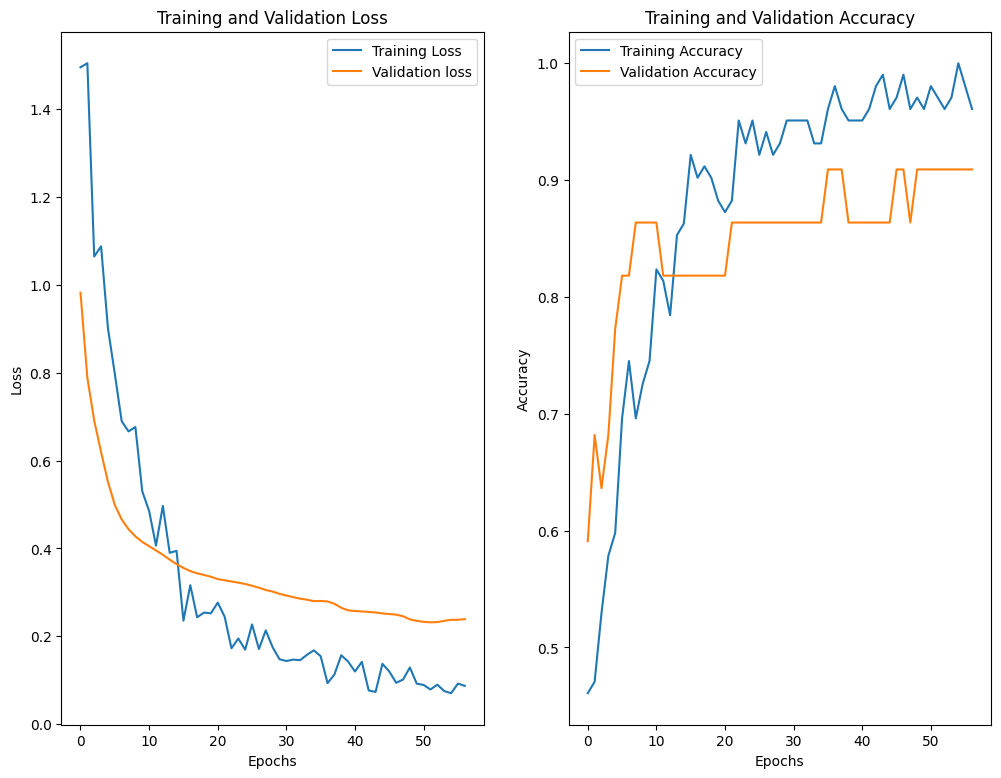

In [97]:
# plot
plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

In [98]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=["bali", "betawi", "parang"]))


1/1 [==============================] - 1s 515ms/step
Classification Report:
              precision    recall  f1-score   support

        bali       1.00      1.00      1.00         8
      betawi       1.00      1.00      1.00         7
      parang       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



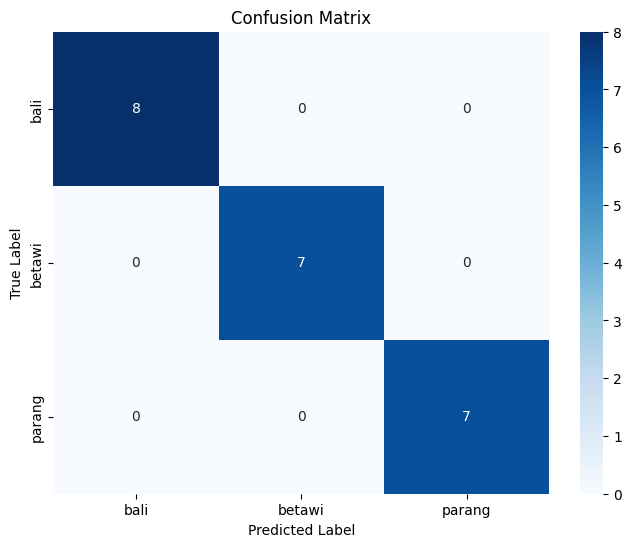

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["bali", "betawi", "parang"], 
            yticklabels=["bali", "betawi", "parang"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()